In [1]:
import numpy as np
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Setup pytrend library 

In [145]:
pytrends = TrendReq(hl = 'en-US' , tz = 360)
keyword = input("Enter the keyword : ")

Enter the keyword :  cricket


# Data request

In [189]:
pytrends.build_payload([keyword] , cat = 0 , timeframe = 'today 12-m' , geo = '' , gprop = '')

# Country-wise Interest

In [217]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword , ascending=False ).head(15)

In [219]:
region_data.head(15)

,cricket
geoName,
Sri Lanka,100
Pakistan,84
Afghanistan,82
India,82
Bangladesh,78
Nepal,72
United Arab Emirates,64
Qatar,61
Bahrain,46


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23084\1489148258.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




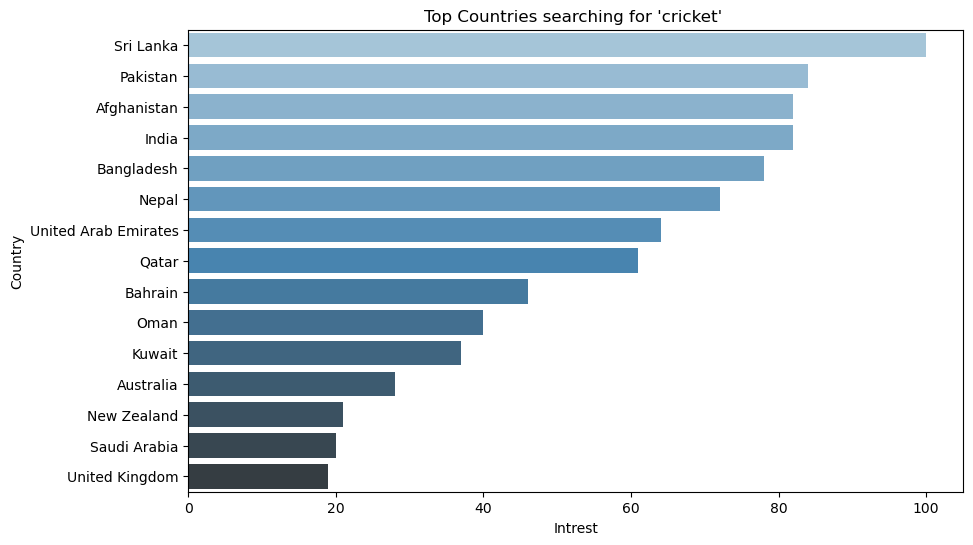

In [225]:
plt.figure(figsize=(10,6))
sns.barplot(x = region_data[keyword] , y = region_data.index , palette="Blues_d")
plt.title(f"Top Countries searching for '{keyword}' ")
plt.xlabel("Intrest")
plt.ylabel("Country")
plt.show()

# World Map

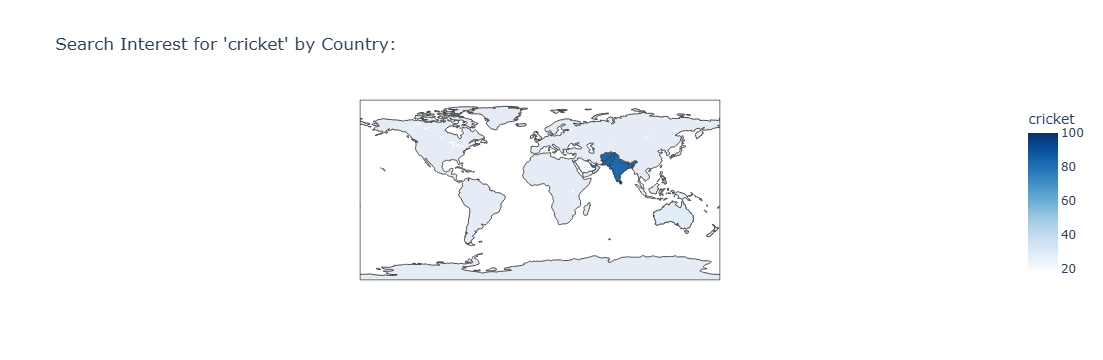

In [227]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations='geoName',
                   locationmode='country names',
                   color = keyword,
                   title = f"Search Interest for '{keyword}' by Country:",
                   color_continuous_scale='Blues')
fig.show()

# Time-wise Interest

In [235]:
time_df = pytrends.interest_over_time()

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [237]:
time_df.head(10)

,cricket,isPartial
date,,
2024-06-16,65,False
2024-06-23,100,False
2024-06-30,41,False
2024-07-07,51,False
2024-07-14,29,False
2024-07-21,39,False
2024-07-28,59,False
2024-08-04,42,False
2024-08-11,21,False


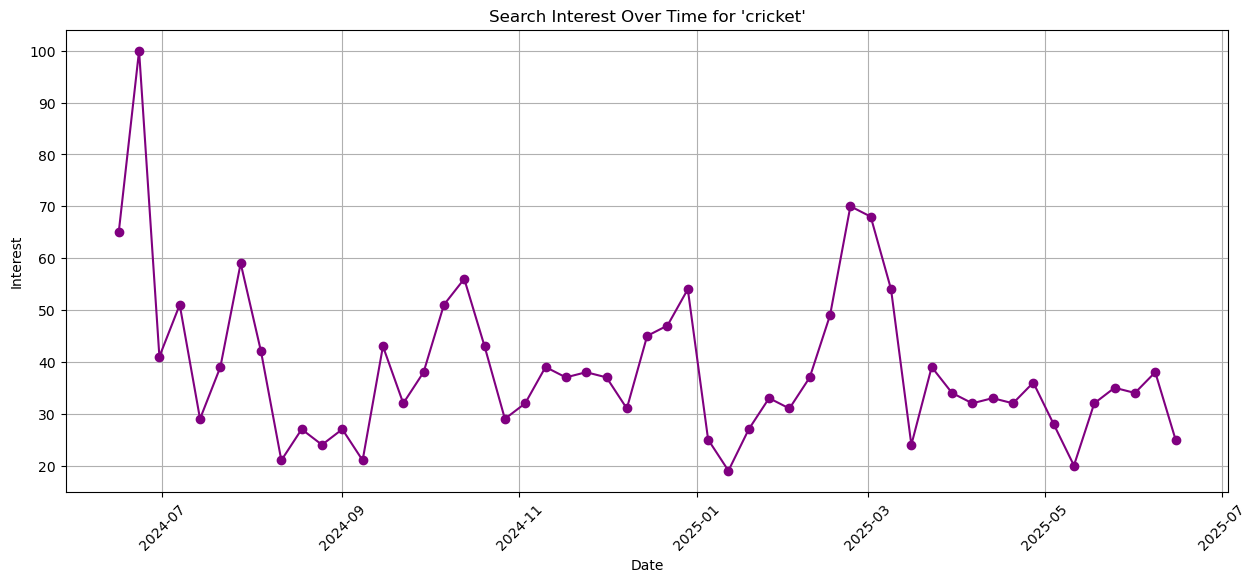

In [239]:
plt.figure(figsize=(15,6))
plt.plot(time_df.index, time_df[keyword], marker='o', color='purple')
plt.title(f"Search Interest Over Time for '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Comparing Multiple Keywords

In [135]:
k_list = ["cloud computing", "data science", "machine learning","Artificial intelligence"]
pytrends.build_payload(k_list, cat=0, timeframe='today 12-m', geo='', gprop='')

In [137]:
compare_df = pytrends.interest_over_time()

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [139]:
compare_df.head(10)

,cloud computing,data science,machine learning,Artificial intelligence,isPartial
date,,,,,
2024-06-16,21,78,90,77,False
2024-06-23,25,85,90,75,False
2024-06-30,21,72,88,68,False
2024-07-07,23,76,92,68,False
2024-07-14,23,75,86,66,False
2024-07-21,25,80,92,70,False
2024-07-28,22,74,84,67,False
2024-08-04,27,74,86,68,False
2024-08-11,22,75,87,67,False


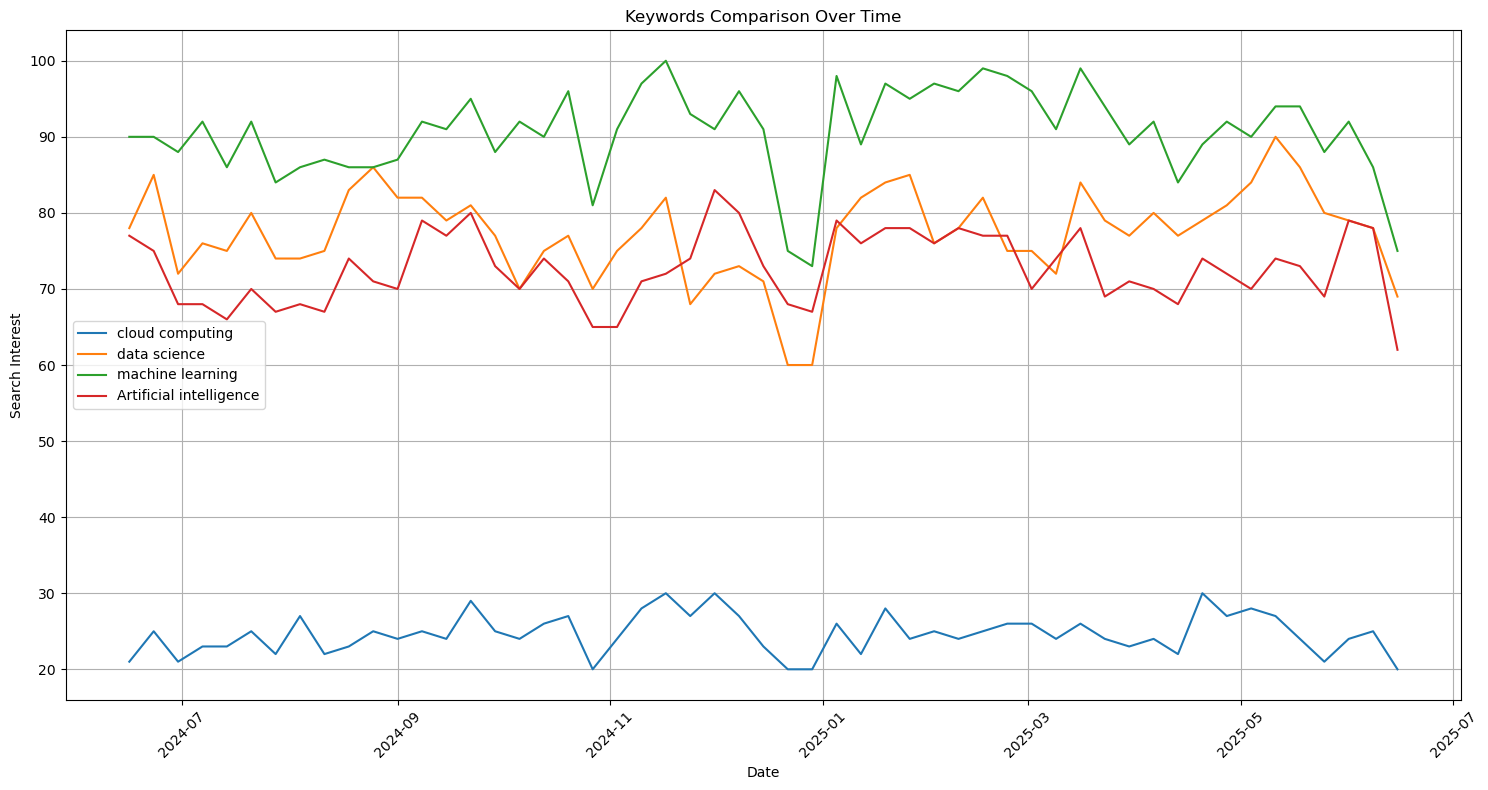

In [143]:
plt.figure(figsize=(15,8))
for kw in k_list:
   plt.plot(compare_df.index, compare_df[kw], label=kw)
plt.title("Keywords Comparison Over Time")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()